### Firewall Rule Classfication
## Instructions

You are tasked with developing a machine learning model for classifying firewall rules into different
categories such as Allow, Drop, and Deny. The dataset contains various features related to firewall
rules, and the goal is to predict the classification of new firewall rules based on these features. The
features include source and destination ports, bytes of data transferred, number of packets transferred,
time elapsed, and NAT ports.
1) Objective:
• State the main objective of the machine learning model in this scenario.
• Why is automating the classification of firewall rules using machine learning
beneficial?
2) Dataset:
• Provide a brief overview of the dataset, including the features it contains.
• Explain the use of LabelEncoder in preprocessing the data.
3) Models Explored:
• Use machine learning models Decision Trees, and Random Forest (You can try KNearest Neighbors, Naïve Bayes, and Gradient Boosting as well but Decision tree and
Random forest are required).
4) Results and Analysis:
• Provide a summary of the results obtained from each classifier model.
5) Code Implementation:
• Include relevant portions of the Python code used for data preprocessing, model
training, and evaluation.
• Explain the steps involved in training and evaluating each model.
6) Visualization:
• Include visualizations such as count plots for class distribution and a correlation
matrix heatmap.
• Discuss the importance of these visualizations in understanding the dataset.
7) Conclusion:
• Summarize the key findings and the most effective model for this firewall rule
classification task.
• Discuss any insights gained from the analysis and results.
8) Further Exploration:
• Suggest potential avenues for further exploration or improvement in the model.
• Are there additional features or techniques that could enhance the model's
performance?

### **Step 1**: Objective

By learning from historical data, the model can predict the appropriate classification for new or unseen firewall rules. This will make the rules more consistent, more accurate and the system will be more scalable .


In [1]:
# Load the data from the local file

from google.colab import files
import pandas as pd
import io

# Upload the dataset from the local machine
uploaded = files.upload()

# get the filename
for filename in uploaded.keys():
    print(f'User uploaded file "{filename}"')
    # Read the file into a pandas DataFrame
    try:
        df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))
        print("Dataset loaded successfully.")
        display(df.head())
    except Exception as e:
        print(f"An error occurred while loading the dataset: {e}")

Saving Firewall_Rule_Classification .csv to Firewall_Rule_Classification .csv
User uploaded file "Firewall_Rule_Classification .csv"
Dataset loaded successfully.


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Class
0,33313,443,29395,443,9675,2389,7286,43,143,21,22,allow
1,53871,443,15841,443,7797,1807,5990,15,135,7,8,allow
2,56628,443,13354,443,8240,3521,4719,25,18,15,10,allow
3,50270,445,0,0,70,70,0,1,0,1,0,drop
4,64113,53,33491,53,294,134,160,2,30,1,1,allow


### **Step 2**: Dataset overview and its features

In [2]:
# Explore the data

# See the size of the dataset
print("No of Samples:", df.shape[0])
print("No of features:", df.shape[1])

# See the feture data types
print(df.dtypes)
print(df['Class'].value_counts())


No of Samples: 262128
No of features: 12
Source Port              int64
Destination Port         int64
NAT Source Port          int64
NAT Destination Port     int64
Bytes                    int64
Bytes Sent               int64
Bytes Received           int64
Packets                  int64
Elapsed Time (sec)       int64
pkts_sent                int64
pkts_received            int64
Class                   object
dtype: object
Class
allow         150314
deny           60053
drop           51539
reset-both       222
Name: count, dtype: int64


The dataset contains 262,128 samples of network traffic passing through a firewall and the firewall's decision, i.e. to allow the traffic, deny or drop or reset both sides of the connection. The features are Source and Destination port, NAT source and destination port, total bytes and bytes sent and received, total number of packets and packets sent and received, elapsed time for the connection and the categorical column Class, which is the firewall decision applied to the traffic flow. Sicne the class columen is categorical, we need to use a Label Encoder to covert it to numerical values.

In [3]:
# Use label encoder to encode Class type to numbers

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Class_num'] = le.fit_transform(df['Class'])
print("Class mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Drop the columns related to the target for the features
X = df.drop(columns=['Class', 'Class_num'], axis=1)
y = df['Class_num']

# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(X_train.columns)


Class mapping: {'allow': np.int64(0), 'deny': np.int64(1), 'drop': np.int64(2), 'reset-both': np.int64(3)}
Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received'],
      dtype='object')


### **Step 3.1** Try The Decision Tree Model
Decision Tree does not require scaling the data

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# traing the decision tree
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluate

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#Check which features are most important

importances = pd.Series(clf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)
print(top_features)



Decision Tree Accuracy: 0.9988555296990043

Confusion Matrix:
 [[45085     9     0     0]
 [    2 17973    41     0]
 [    0     7 15455     0]
 [    0    31     0    36]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45094
           1       1.00      1.00      1.00     18016
           2       1.00      1.00      1.00     15462
           3       1.00      0.54      0.70        67

    accuracy                           1.00     78639
   macro avg       1.00      0.88      0.92     78639
weighted avg       1.00      1.00      1.00     78639

Elapsed Time (sec)      0.620077
Destination Port        0.365991
Packets                 0.011589
Bytes                   0.000756
pkts_sent               0.000518
Source Port             0.000354
NAT Destination Port    0.000292
pkts_received           0.000235
Bytes Sent              0.000152
NAT Source Port         0.000038
dtype: float64


### **Step 3.2** Try The Random Forrest Model
Random Forrest does not require scaling the data either since it is a tree-based model

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=10, random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Evaluate

print("Random Forrest Tree Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

#Check which features are most important

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)
print(top_features)

Random Forrest Tree Accuracy: 0.9987665153422602

Confusion Matrix:
 [[45085     9     0     0]
 [    2 17967    47     0]
 [    0     0 15462     0]
 [    0    39     0    28]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45094
           1       1.00      1.00      1.00     18016
           2       1.00      1.00      1.00     15462
           3       1.00      0.42      0.59        67

    accuracy                           1.00     78639
   macro avg       1.00      0.85      0.90     78639
weighted avg       1.00      1.00      1.00     78639

Destination Port        0.242785
Elapsed Time (sec)      0.195313
NAT Source Port         0.148817
NAT Destination Port    0.139753
Packets                 0.065089
Bytes                   0.060782
pkts_received           0.046592
Source Port             0.041636
Bytes Sent              0.031225
Bytes Received          0.026718
dtype: float64


### Results and Analysis

Both the Decision Tree and Random Forest classifiers achieved very high overall accuracy and very high recall for the major classes (allow, deny, and drop).
They both had lower performance for the "reset-both" class, whre Decision Tree had recall of 0.54 and Random Forrest 0.59. The reason for this is that the rest-both class is very underrepresented in the dataset - only 222 samples out of 262,128, i.e. less than 0.1%, so the dataset is imbalanced.

Since the model encounters very few examples of this class during training, it cannot learn its patterns effectively and tends to misclassify those samples as one of the major categories. Increasing the max_depth parameter for both classifiers improves the recall for rest-both class but with very high tree depth we risk overfitting.

Overall, despite the imbalance, the models show good performance for the primary classes, which represent the vast majority of firewall decisions.

The feature importance shows how much each feature reduces the impurity when using it for tree splits. In the case of Decision Tree the main feature was Elapsed Time, followed by Destination Port, while for Random Forrest the main feature is Destination Port. The elapsed time represent the duration of the network flow and in the case of stateful firewall that can influence the decision.  

### Visualizations

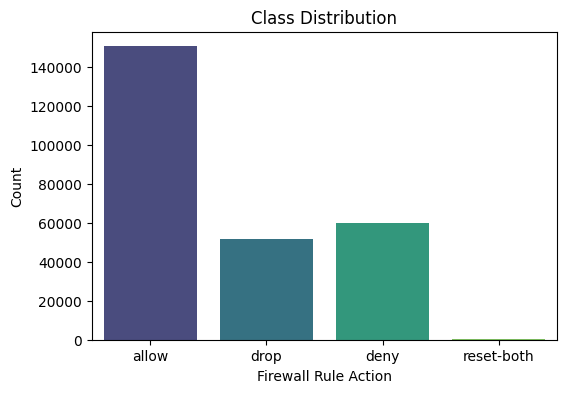

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Class', hue='Class', data=df, palette='viridis', legend=False)
plt.title('Class Distribution')
plt.xlabel('Firewall Rule Action')
plt.ylabel('Count')
plt.show()


### Correlation Matrix Heatmap

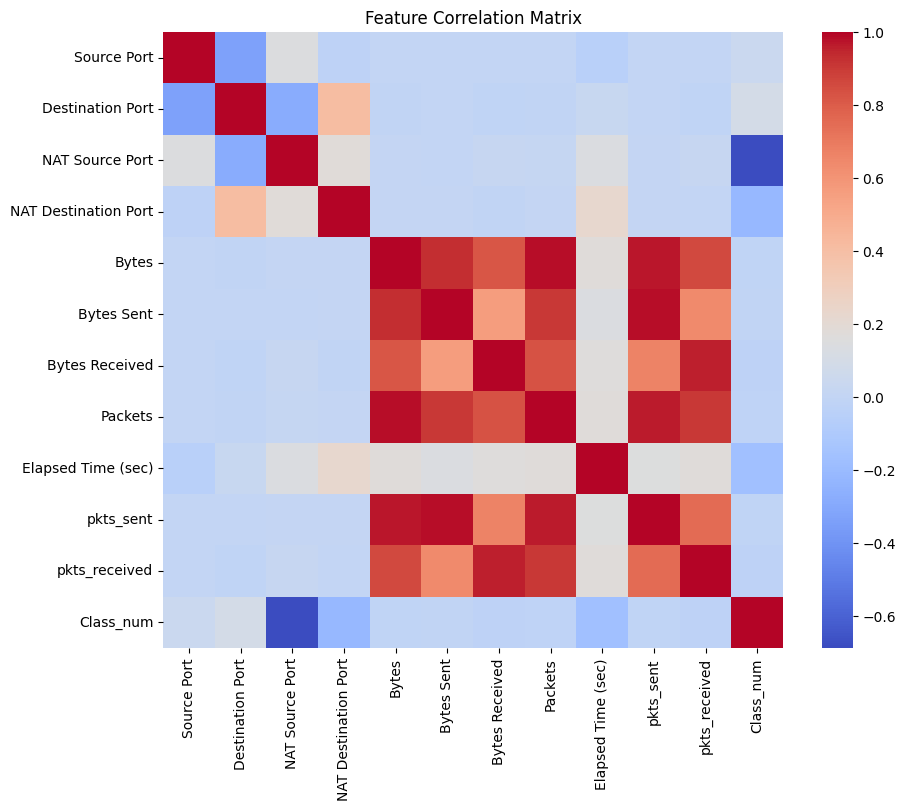

In [ ]:
plt.figure(figsize=(10,8))
corr = df.drop('Class', axis=1).corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


### Importance of visualizations for understanding the dataset

The visualizations help is easily undestand how the different classes are represented in the dataset and if it is imbalanced. It is easy to see the the "allow" class dominates with number of samples while the "reset-both" is barely represented. Imbalance can be a problem because in some cases the model can achieve high accuracy by simply predicting the majority class most of the time. In this case the dataset is only moderately imbalanced.

The correlation heatmap shows how correlated the features are and if some features may be redundant. In our case, for example, bytes, bytes_sent, packets and packets_sent are strongly correlated, which makes sense as they all relate the the volume of traffic. For some models multicolinearity between features can have negative effect on model performance, however, this is not the case with DecisionTree or RandomForrest which pick the most informative splits.

### Conclusion and Further Exploration

Both the Decision Tree and Random Forest classifiers achieved similar performance, with near-perfect accuracy and recall across the 3 major classes and not so good recall for the heavily underrepresented "reset-both" class. This suggests that the dataset exhibits deterministic relationships between network flow features and firewall decisions. Because tree-based models partition the feature space according to decision rules, both models were able to perfectly learn the underlying firewall logic.

The lack of performance difference is expected when the decision boundaries are well-defined and linearly separable, as Random Forest ensembles provide additional robustness primarily in noisy or less structured data. The main predictor features were Elapsed Time and Destination Port while correlated features, such as Bytes and Packets, provided redundant information but did not negatively affect the performance of tree-based models, as these algorithms are not so much affected by multicollinearity.